In [33]:
import pandas as pd
import numpy as np
import matplotlib as pyplot
import seaborn as sns
import sklearn

In [5]:

# Read csv file into a pandas dataframe
df = pd.read_csv("data.csv")

# Take a look at the first few rows
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


In [6]:
df['x1'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2222    False
2223    False
2224    False
2225    False
2226    False
Name: x1, Length: 2227, dtype: bool

In [7]:
df['x2'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2222    False
2223    False
2224    False
2225    False
2226    False
Name: x2, Length: 2227, dtype: bool

In [8]:
df['y'].isnull()

0       False
1       False
2       False
3       False
4       False
        ...  
2222    False
2223    False
2224    False
2225    False
2226    False
Name: y, Length: 2227, dtype: bool

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2227 entries, 0 to 2226
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   x1      2222 non-null   float64
 1   x2      2224 non-null   float64
 2   y       2227 non-null   int64  
dtypes: float64(2), int64(1)
memory usage: 52.3 KB


In [10]:
df.describe()

,x1,x2,y
count,2222.000000,2.224000e+03,2227.000000
mean,-4.818766,8.947626e+04,0.442299
std,74.939909,2.983323e+06,0.496771
min,-134.369160,-1.348761e+02,0.000000
25%,-71.757030,-8.012983e+01,0.000000
50%,-9.836555,-1.046151e+00,0.000000
75%,59.813962,6.389086e+01,1.000000
max,134.508687,1.000000e+08,1.000000


In [11]:
missing_data = df.isnull()
missing_data.head(5)

,x1,x2,y
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False


In [12]:
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

x1
False    2222
True        5
Name: x1, dtype: int64

x2
False    2224
True        3
Name: x2, dtype: int64

y
False    2227
Name: y, dtype: int64



Based on the summary above containing missing data:

"x1": 5 missing data
"x2": 3 missing data

Whole columns should be dropped only if most entries in the column are empty. In our dataset, none of the columns are empty enough to drop entirely. We have some freedom in choosing which method to replace data; however, some methods may seem more reasonable than others.

<b>Replace by mean:</b>

<ul>
    <li>"x1": 5 missing data</li>
    <li>"x2": 3 missing data</li>

In [15]:
avg_x1=df['x1'].astype('float').mean(axis=0)
print(avg_x1)

-4.818766123605403


In [16]:
df["x1"].replace(np.nan, avg_x1, inplace=True)

In [17]:
avg_x2=df['x2'].astype('float').mean(axis=0)
print(avg_x2)

89476.25894136279


In [18]:
df["x2"].replace(np.nan, avg_x2, inplace=True)

In [19]:
missing_data = df.isnull()
missing_data.head(5)
for column in missing_data.columns.values.tolist():
    print(column)
    print (missing_data[column].value_counts())
    print("")   

x1
False    2227
Name: x1, dtype: int64

x2
False    2227
Name: x2, dtype: int64

y
False    2227
Name: y, dtype: int64



In [20]:
df.dtypes

x1    float64
x2    float64
y       int64
dtype: object

In [21]:
df.head()

,x1,x2,y
0,-119.366669,115.000000,1
1,-101.108044,97.777159,1
2,-130.278658,106.767654,1
3,-114.703415,101.195477,1
4,-119.366669,115.000000,1


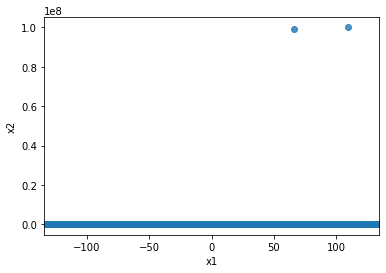

In [24]:
sns.regplot(x=df['x1'], y=df['x2'], data=df)

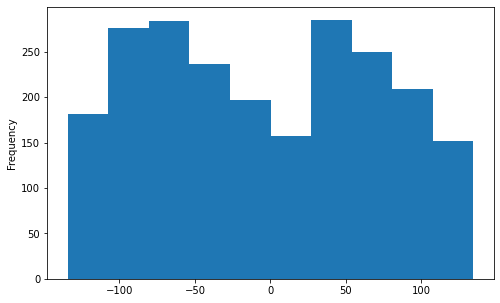

In [27]:
df['x1'].plot(kind='hist', figsize=(8, 5))

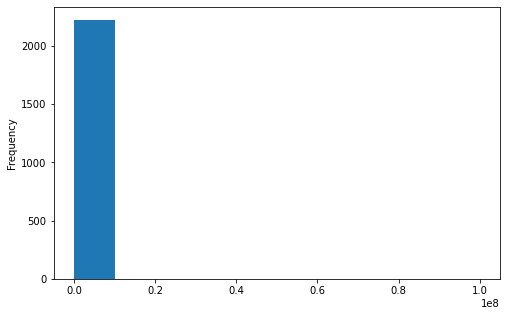

In [28]:
df['x2'].plot(kind='hist', figsize=(8, 5))

In [39]:
x=df[['x1','x2']]
y=df['y']

In [40]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size = 0.25, random_state = 0)

<h1> Logistic Regression

In [41]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(random_state = 0)
classifier.fit(xtrain, ytrain)

LogisticRegression(random_state=0)

In [42]:
y_pred = classifier.predict(xtest)

In [43]:
from sklearn.metrics import accuracy_score
print ("Accuracy in Logistic Regression : ", accuracy_score(ytest, y_pred))

Accuracy :  0.578096947935368


<h1>SVM with Linear Kernel

In [ ]:
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(xtrain, ytrain)
y_pred = svclassifier.predict(xtest)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(ytest,ypred))
print(classification_report(ytest,ypred))

In [ ]:
svc = svm.SVC(kernel ='linear', C = 1).fit(x, y)

<h1>Decision Tree

In [ ]:
dtree.fit(X_train,y_train)

In [ ]:
y_pred = dtree.predict(X_test)
print("Classification report - \n", classification_report(y_test,y_pred)

<h1>kNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
k = 4
#Train Model and Predict  
neigh = KNeighborsClassifier(n_neighbors = k).fit(xtrain,ytrain)
neigh

In [ ]:
yhat = neigh.predict(xtest)
yhat[0:5]

In [ ]:
from sklearn import metrics
print("Train set Accuracy: ", metrics.accuracy_score(y_train, neigh.predict(xtrain)))
print("Test set Accuracy: ", metrics.accuracy_score(y_test, yhat))